In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = 'https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/donations_state.csv'
donate_retention_path = "blood_donation_retention_2024.parquet"
donate_frequency = pd.read_parquet(donate_retention_path)
data = pd.read_csv(path, index_col = 'date', parse_dates = ['date'])

In [5]:
features = ['daily','state']
data = data[features]
data_Malaysia = data[data['state'] == 'Malaysia']
data_Malaysia.tail()

,daily,state
date,,
2024-02-18,2387,Malaysia
2024-02-19,1419,Malaysia
2024-02-20,1609,Malaysia
2024-02-21,1615,Malaysia
2024-02-22,1854,Malaysia


In [6]:
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["figure.autolayout"] = True

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


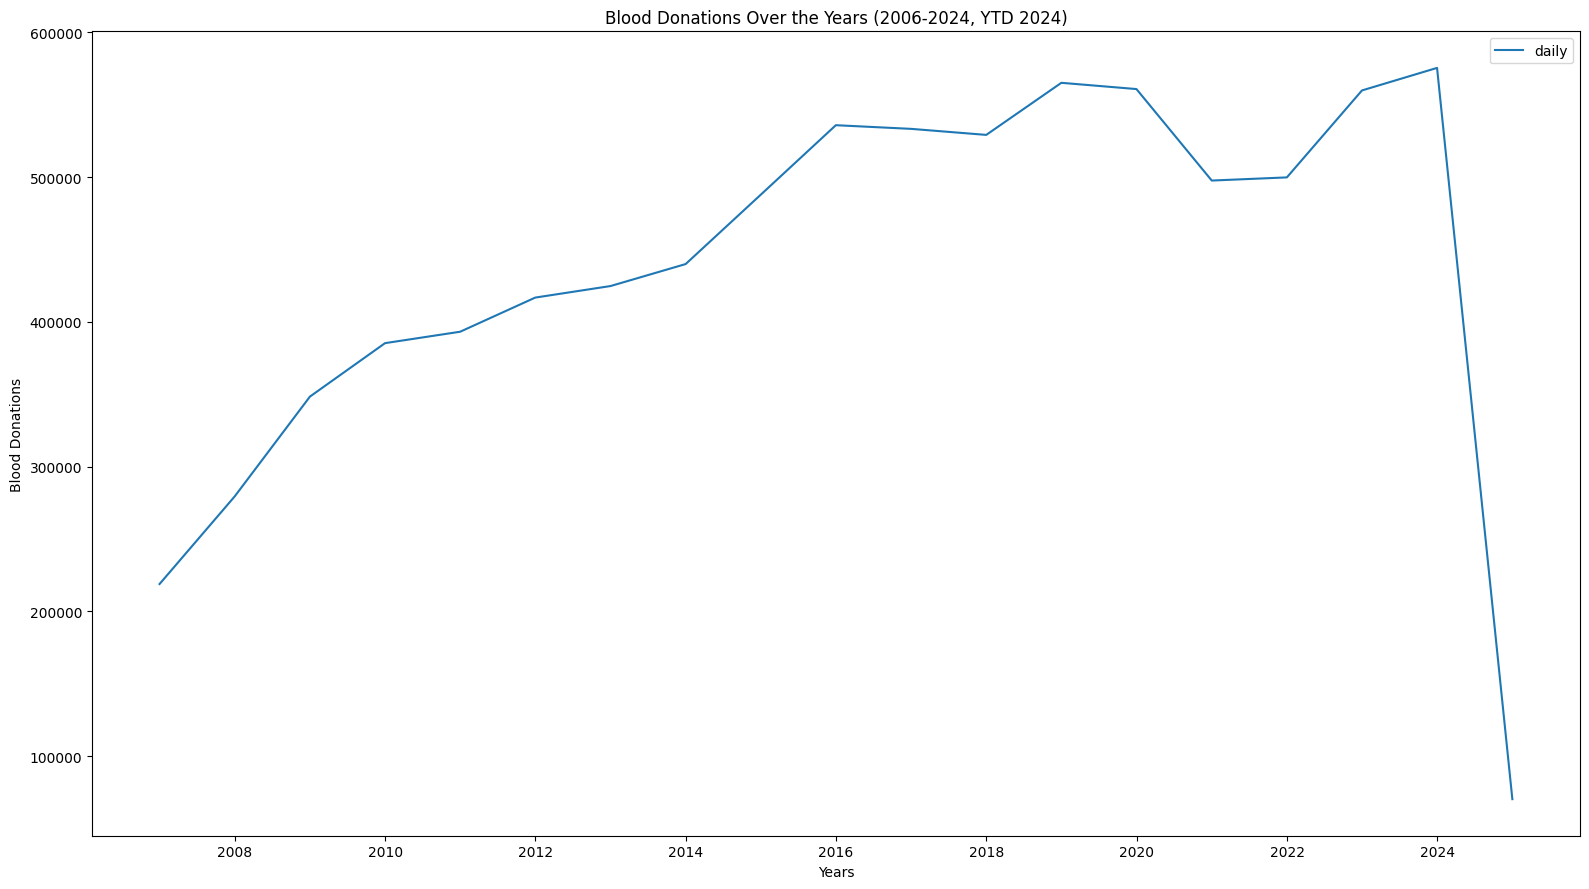

In [8]:
data_Malaysia_yrly = data_Malaysia.resample('YE').sum()
data_Malaysia_yrly.drop(['state'], axis = 1)
plt.title('Blood Donations Over the Years (2006-2024, YTD 2024)')
plt.xlabel('Years')
plt.ylabel('Blood Donations')
sns.lineplot(data=data_Malaysia_yrly)
# plt.savefig('years_donations.png')
plt.show()

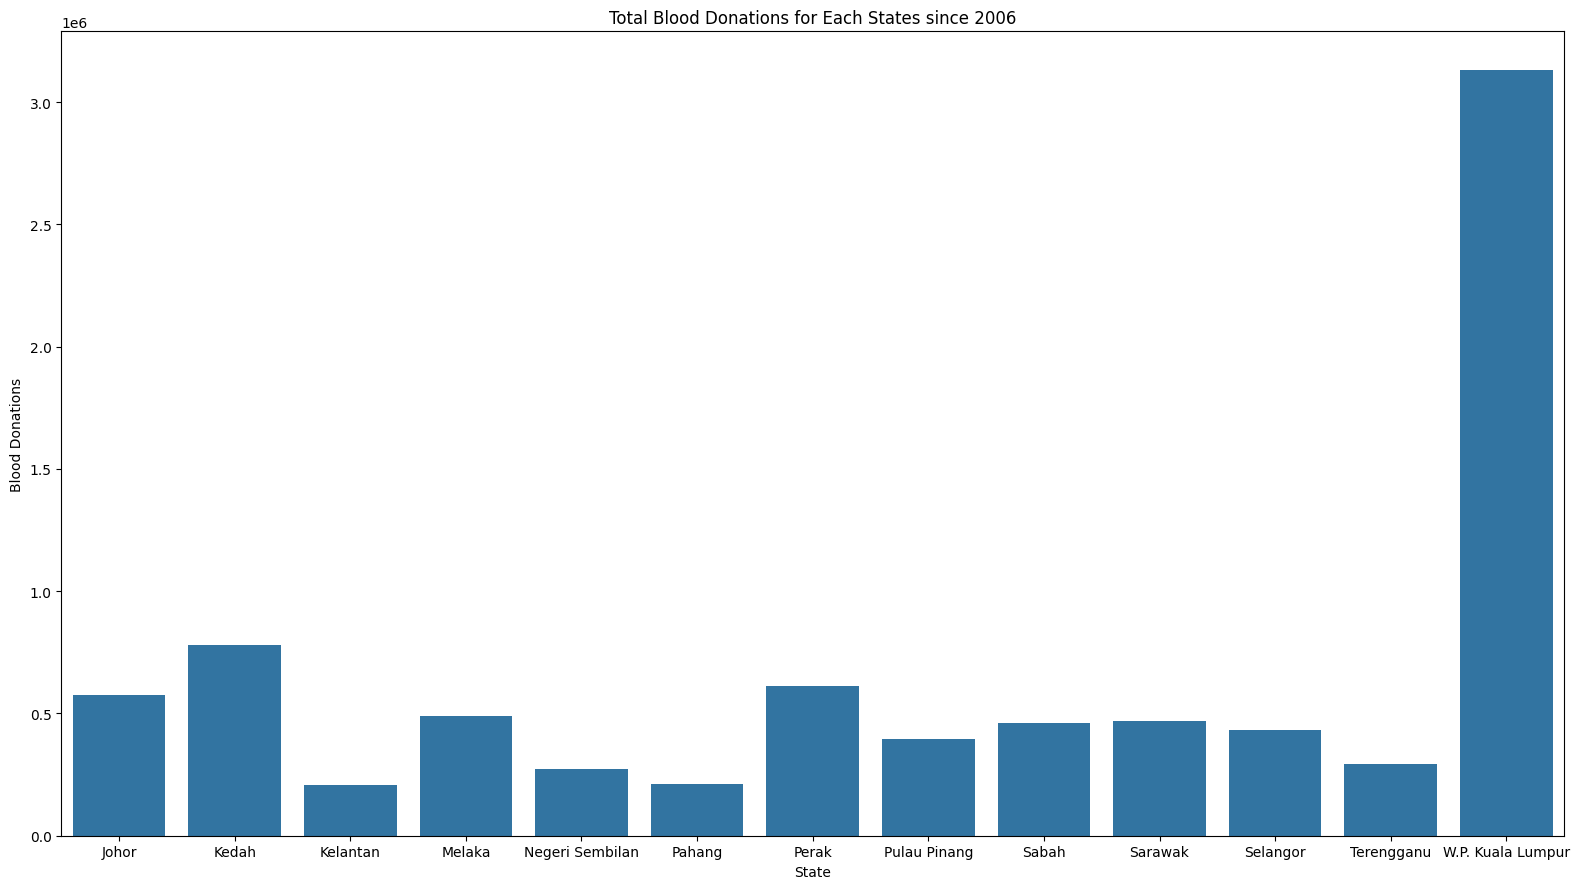

In [8]:
data_states = data[data['state'] != 'Malaysia']
data_states = data_states.groupby(['state']).sum().reset_index()

plt.title('Total Blood Donations for Each States since 2006')
plt.xlabel('State')
plt.ylabel('Blood Donations')
sns.barplot(data=data_states, x='state', y='daily')
# plt.savefig('total_donations_states.png')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


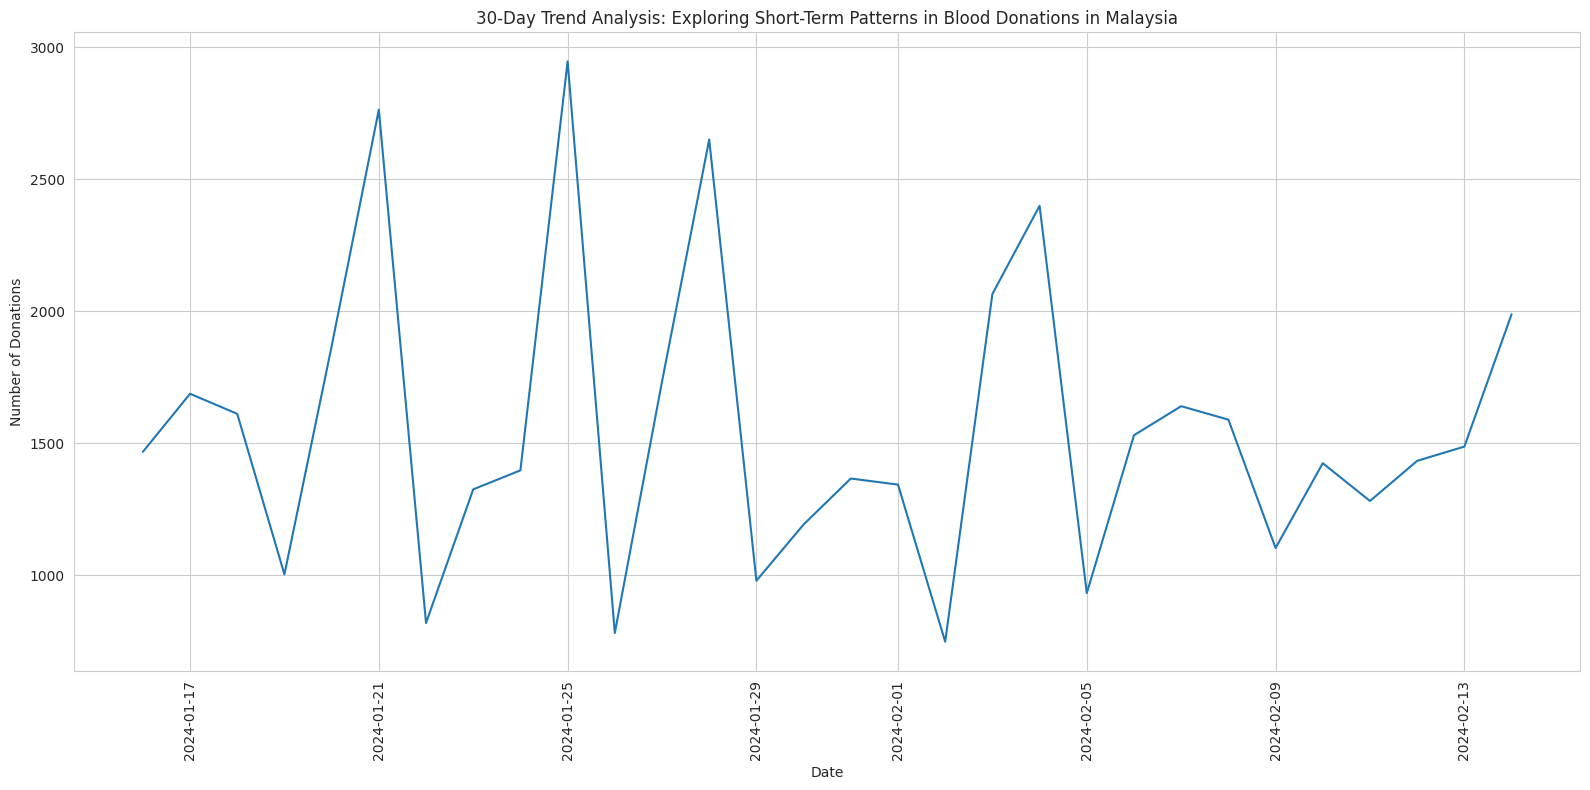

In [21]:
month_data = data_Malaysia.iloc[-30:]
month_data.tail()

plt.figure(figsize=(16,8))
plt.title('30-Day Trend Analysis: Exploring Short-Term Patterns in Blood Donations in Malaysia')
plt.xlabel('Date')
plt.ylabel('Number of Donations')
plt.xticks(rotation = 90)
sns.lineplot(data=month_data, x='date', y='daily')
sns.set_style("whitegrid")
# plt.savefig('blood-donations-MY-trending.png')
plt.show()

In [30]:
donate_frequency['visit_date'] = pd.to_datetime(donate_frequency['visit_date'])
v = donate_frequency.groupby(['donor_id', 'birth_date']).agg({'donor_id': ['count']}).reset_index()
v.columns = ['donor_id', 'birth_date', 'frequency']
v = v.groupby(['birth_date']).agg({'frequency': ['sum']})
v.columns = ['frequency']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


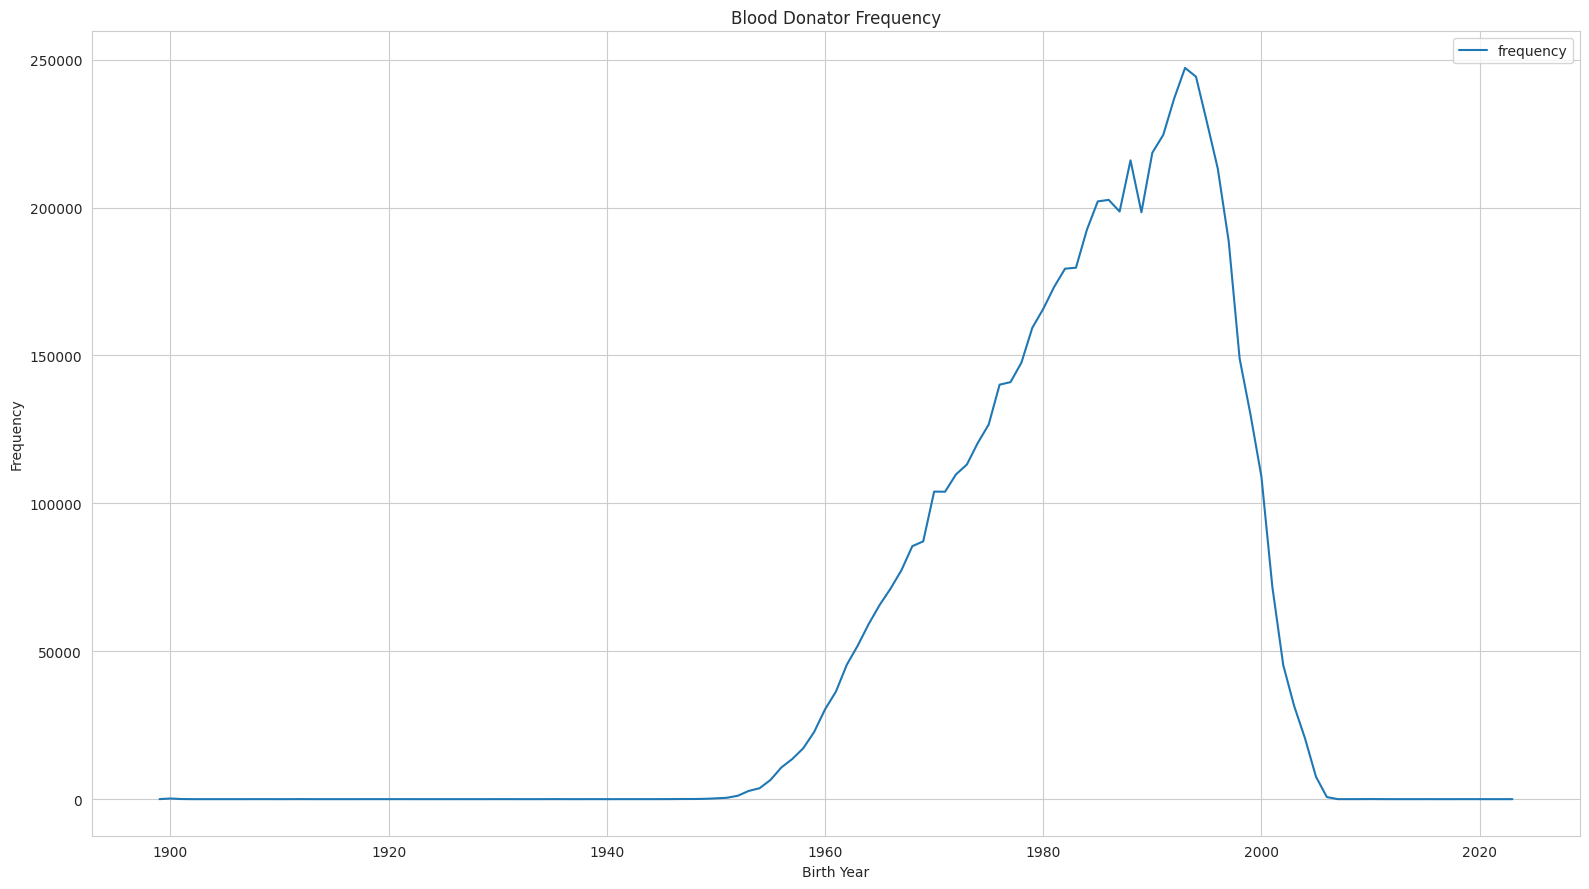

In [29]:
plt.figure(figsize=(16, 9))
plt.title('Blood Donator Frequency')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
sns.lineplot(data=v)
# plt.savefig('donator_frequency.png')
plt.show()